In [86]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [87]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [89]:
# Importing dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


###  Data Exploration 

#### DESCREPTIVE STATISTICS

In [90]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [92]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [93]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    11
dtype: int64 

Null Percentage for Columns:

 0.0    11
dtype: int64


### Missing Values 

In [94]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


### Duplicated Values

#### print the duplicated rows

In [95]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
data.duplicated().sum()

1

In [96]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


## Exploratory Data Analysis

 ### Lets analyze the features by creating histograms to understand the distribution

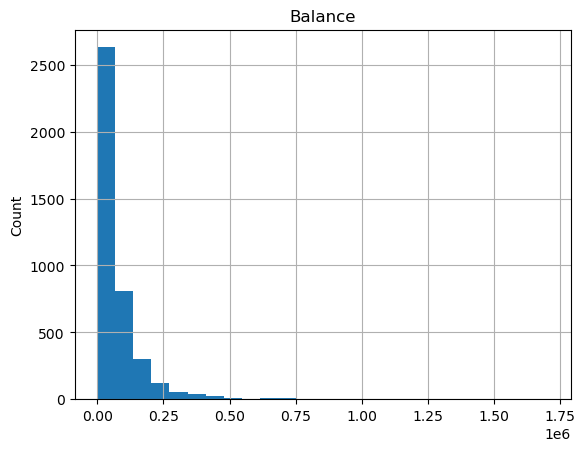

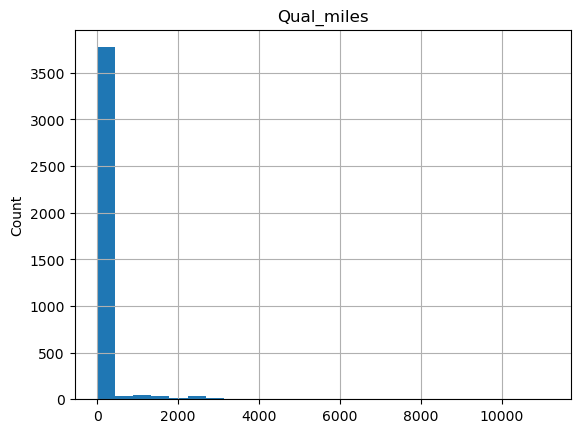

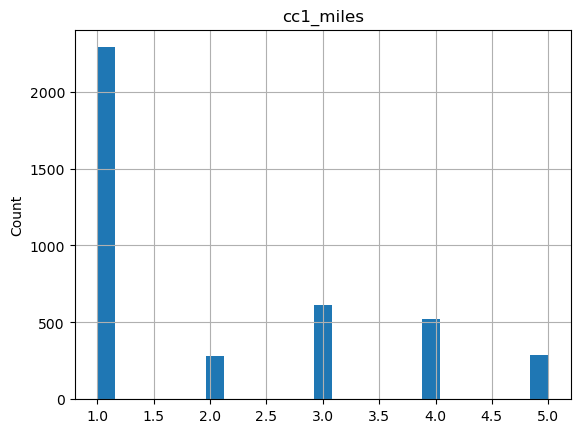

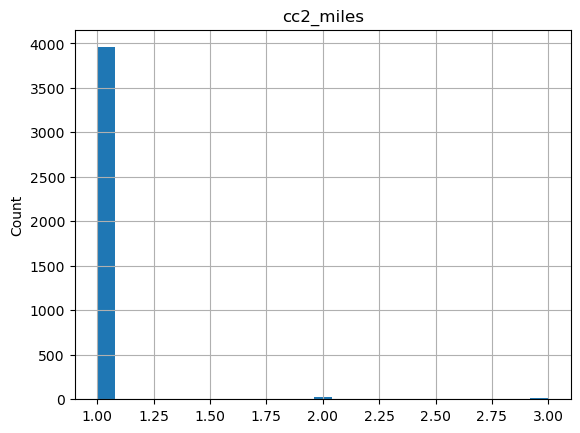

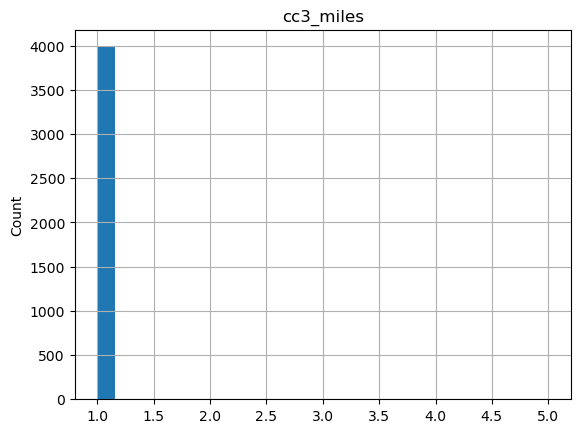

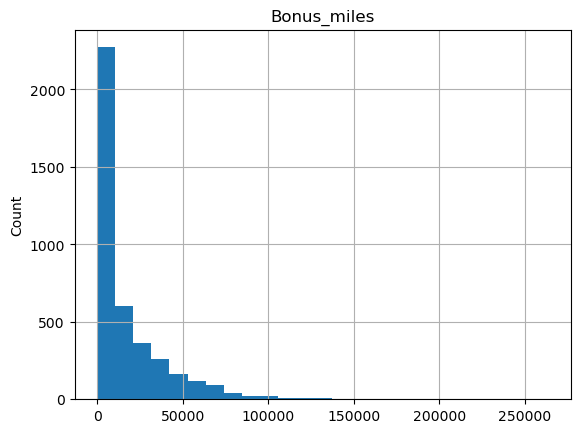

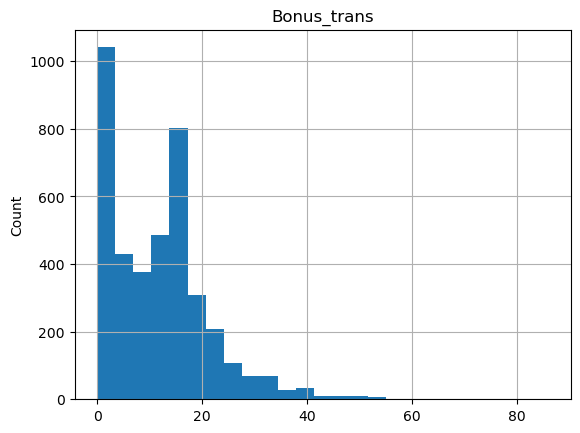

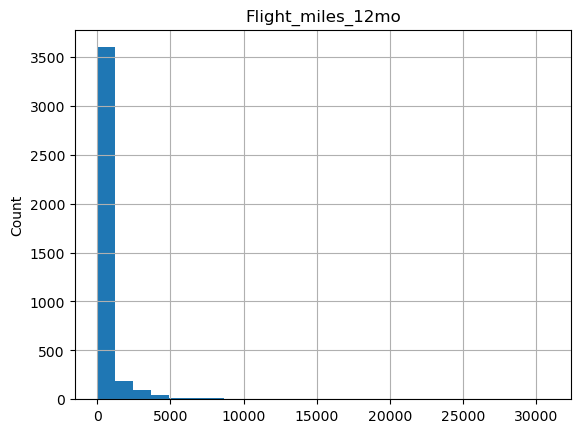

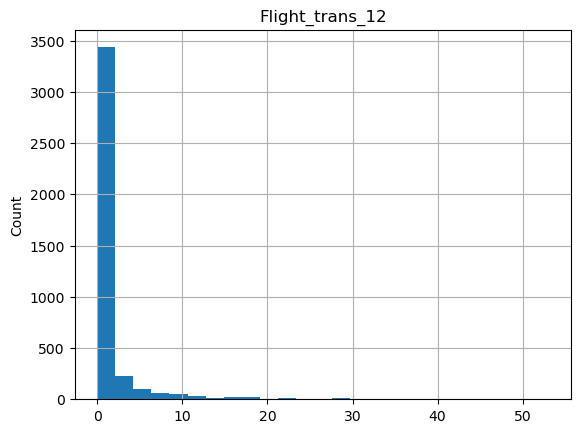

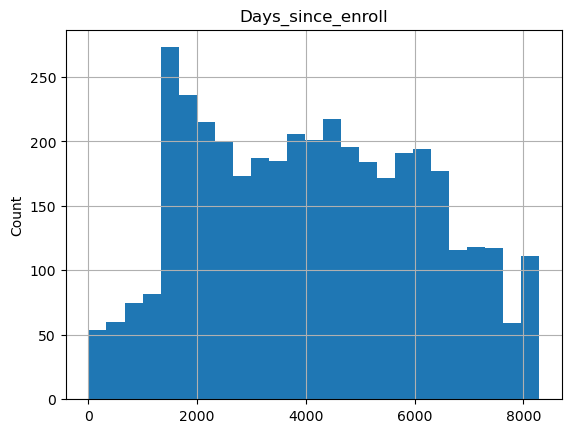

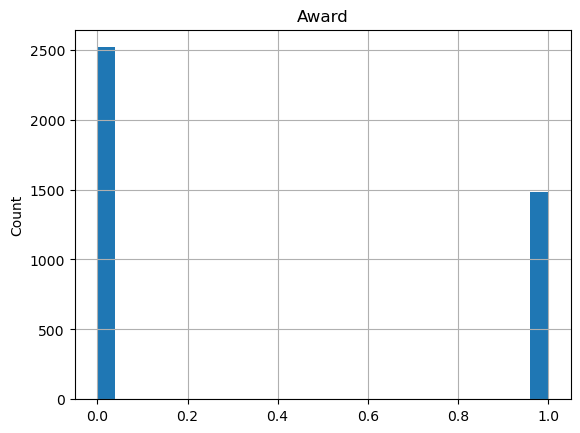

In [15]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


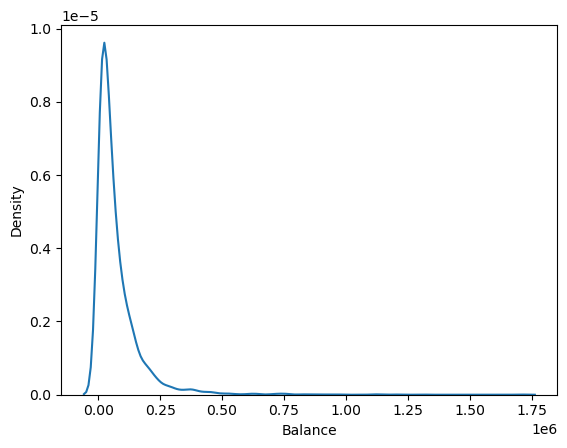

Qual_miles


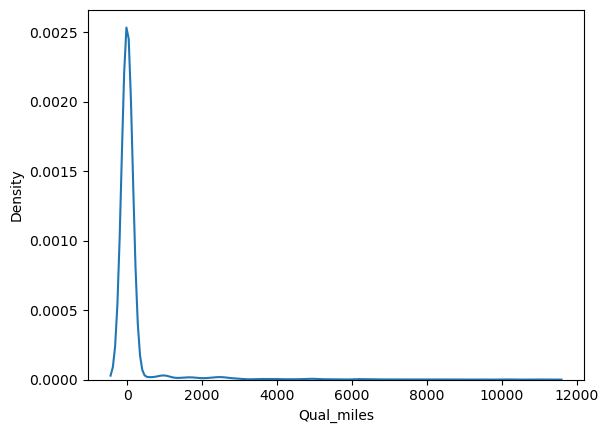

cc1_miles


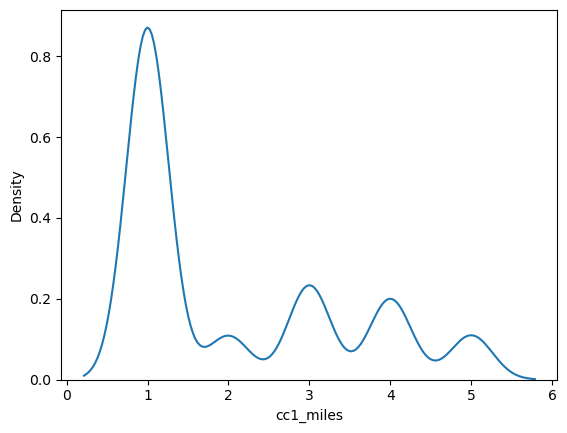

cc2_miles


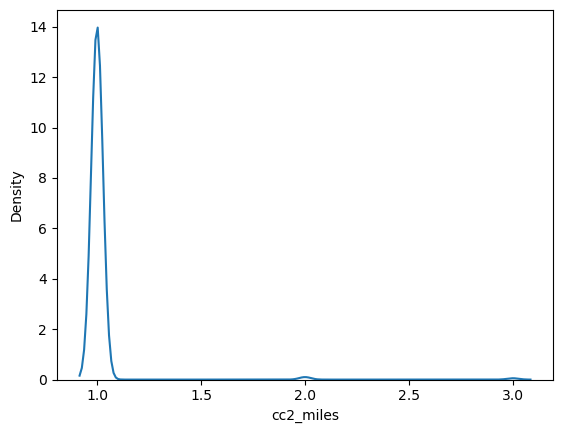

cc3_miles


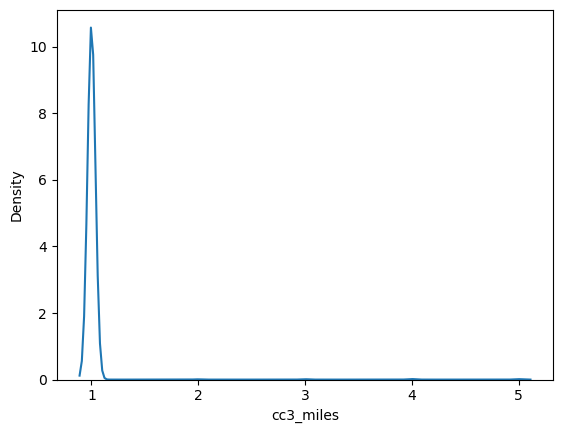

Bonus_miles


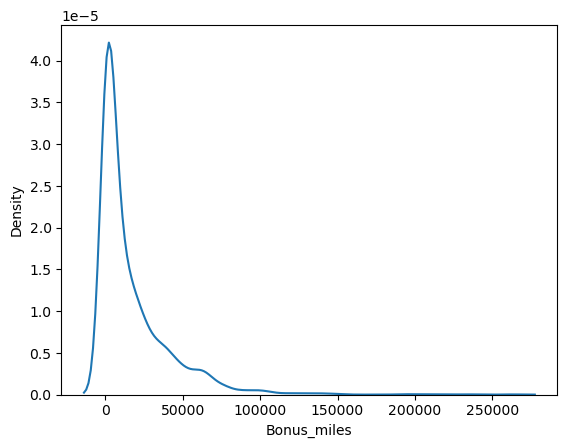

Bonus_trans


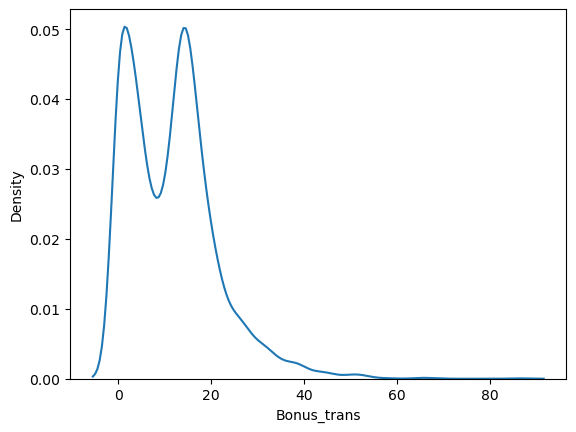

Flight_miles_12mo


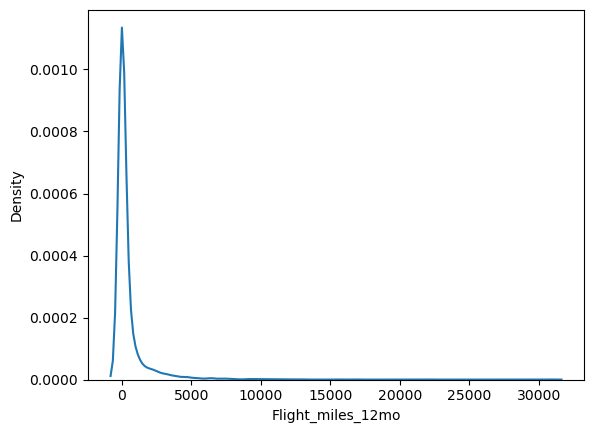

Flight_trans_12


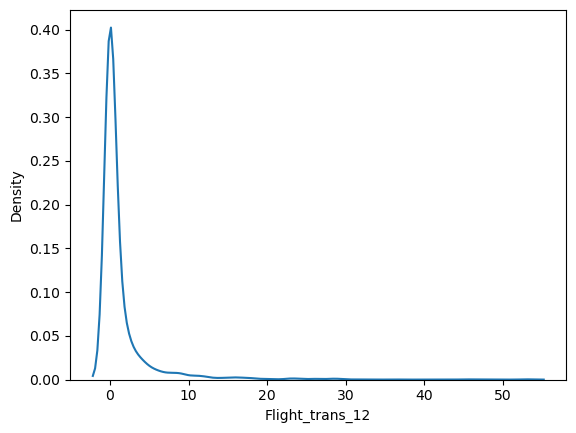

Days_since_enroll


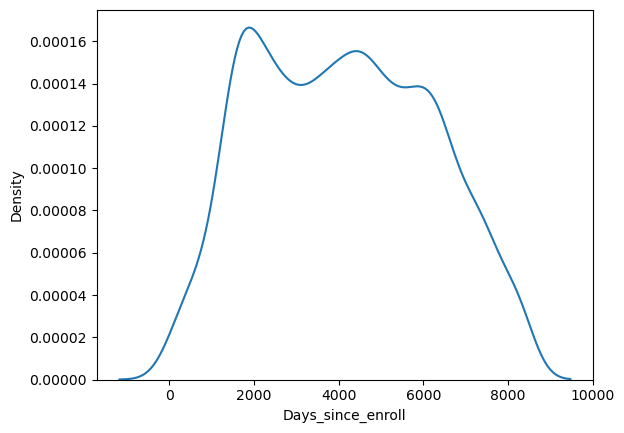

Award


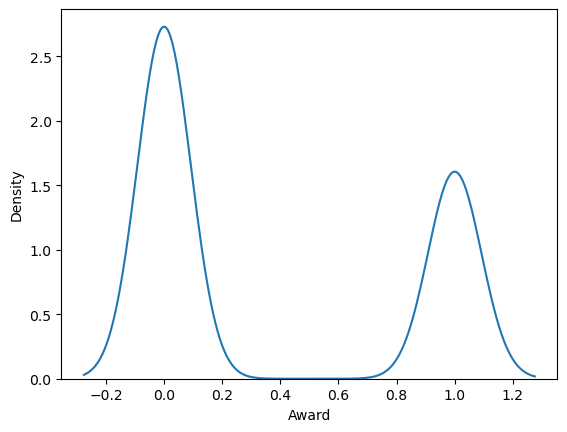

In [16]:
# Kernel Density for every feature, singled out

for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

### Outliers Detection

In [17]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

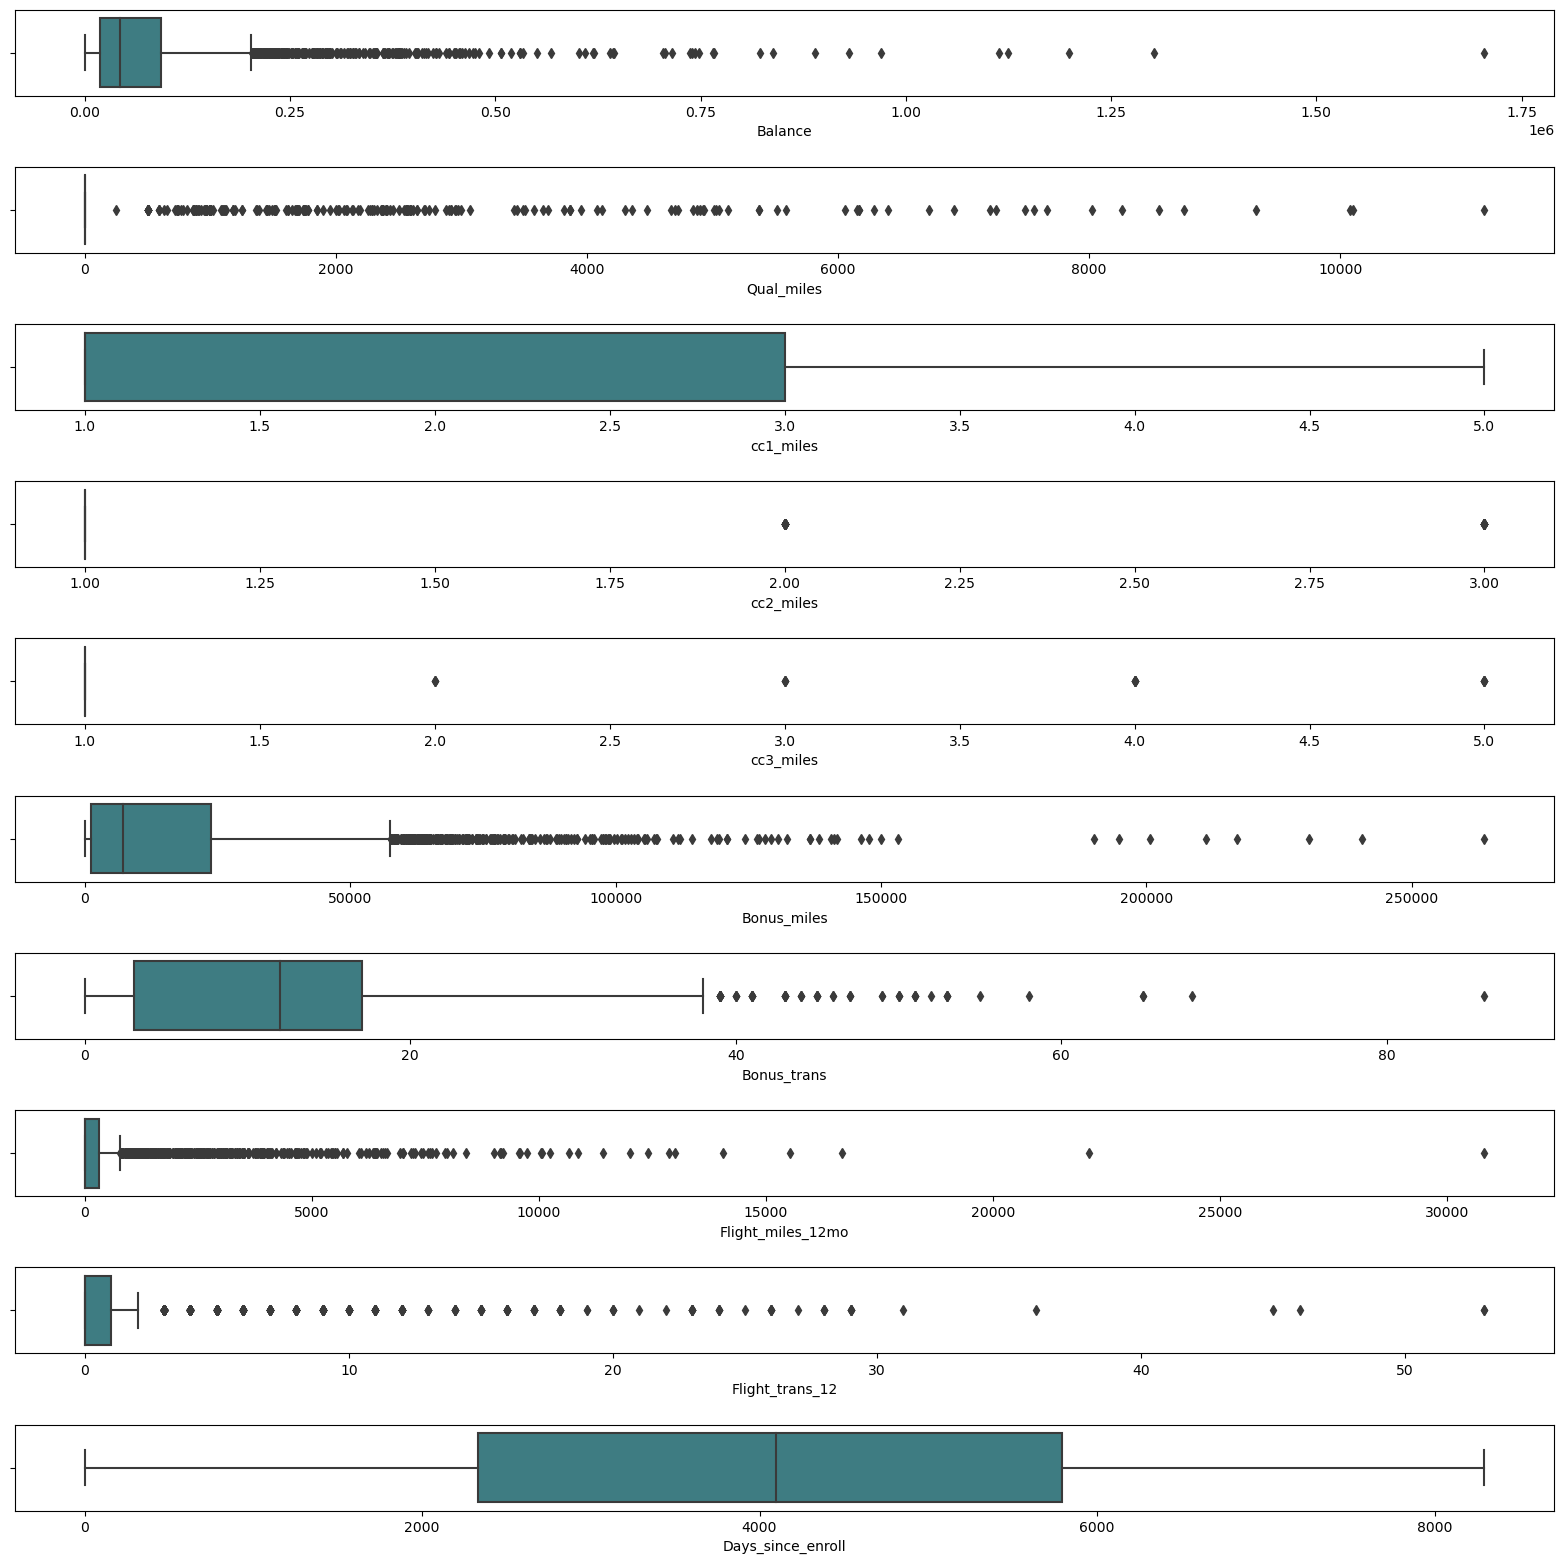

In [18]:
ot=data.copy() 
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

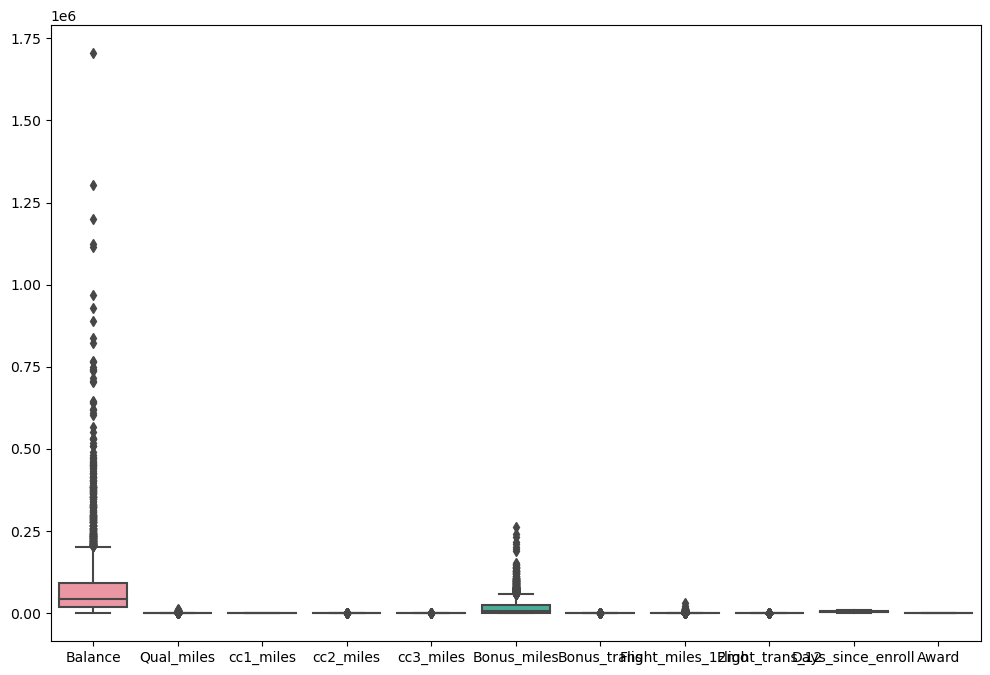

In [19]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

<AxesSubplot:>

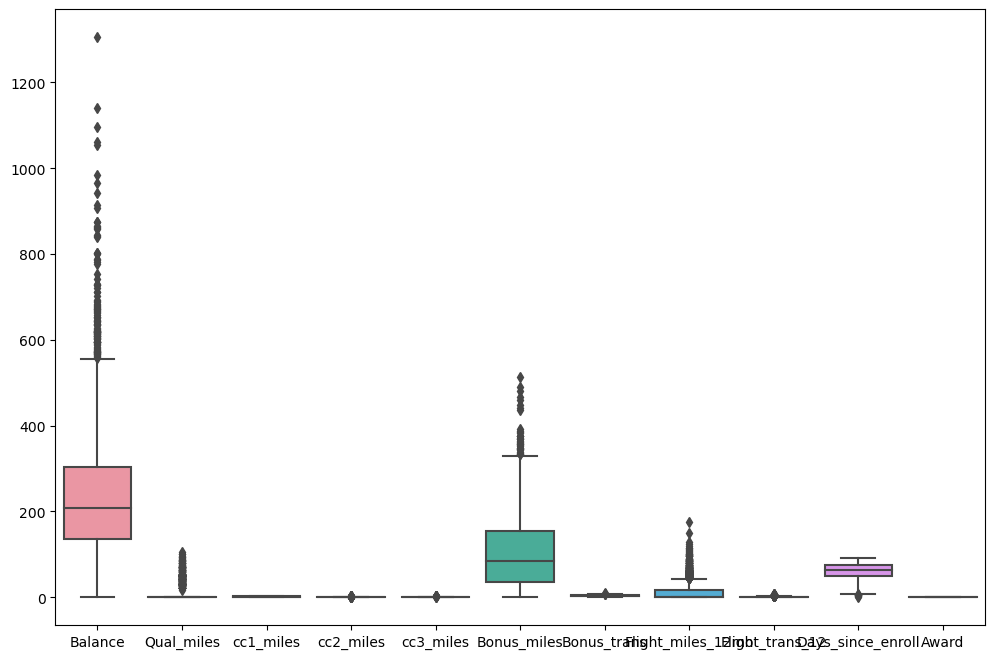

In [20]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

### Data Visualization

In [21]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

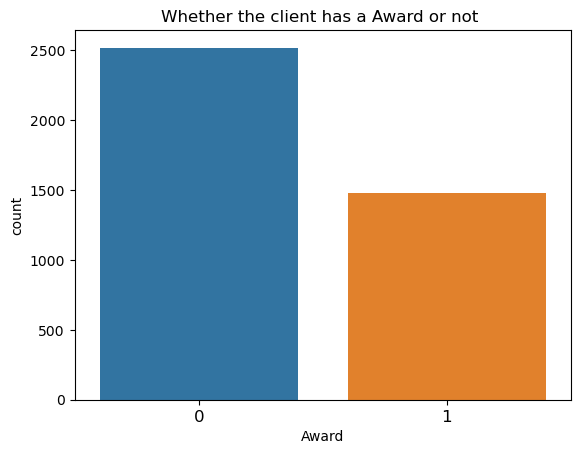

In [22]:
sns.countplot(x='Award', data=data, 
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

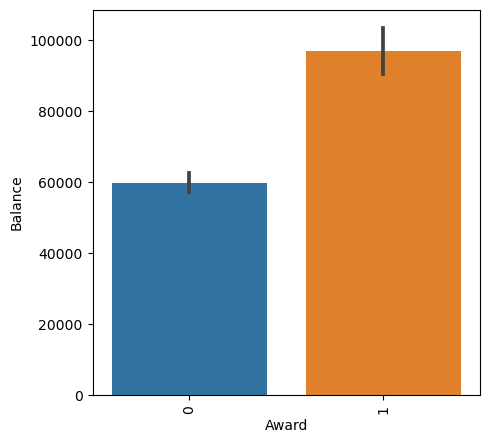

In [23]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [24]:
# what is correlated with Balance?

corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

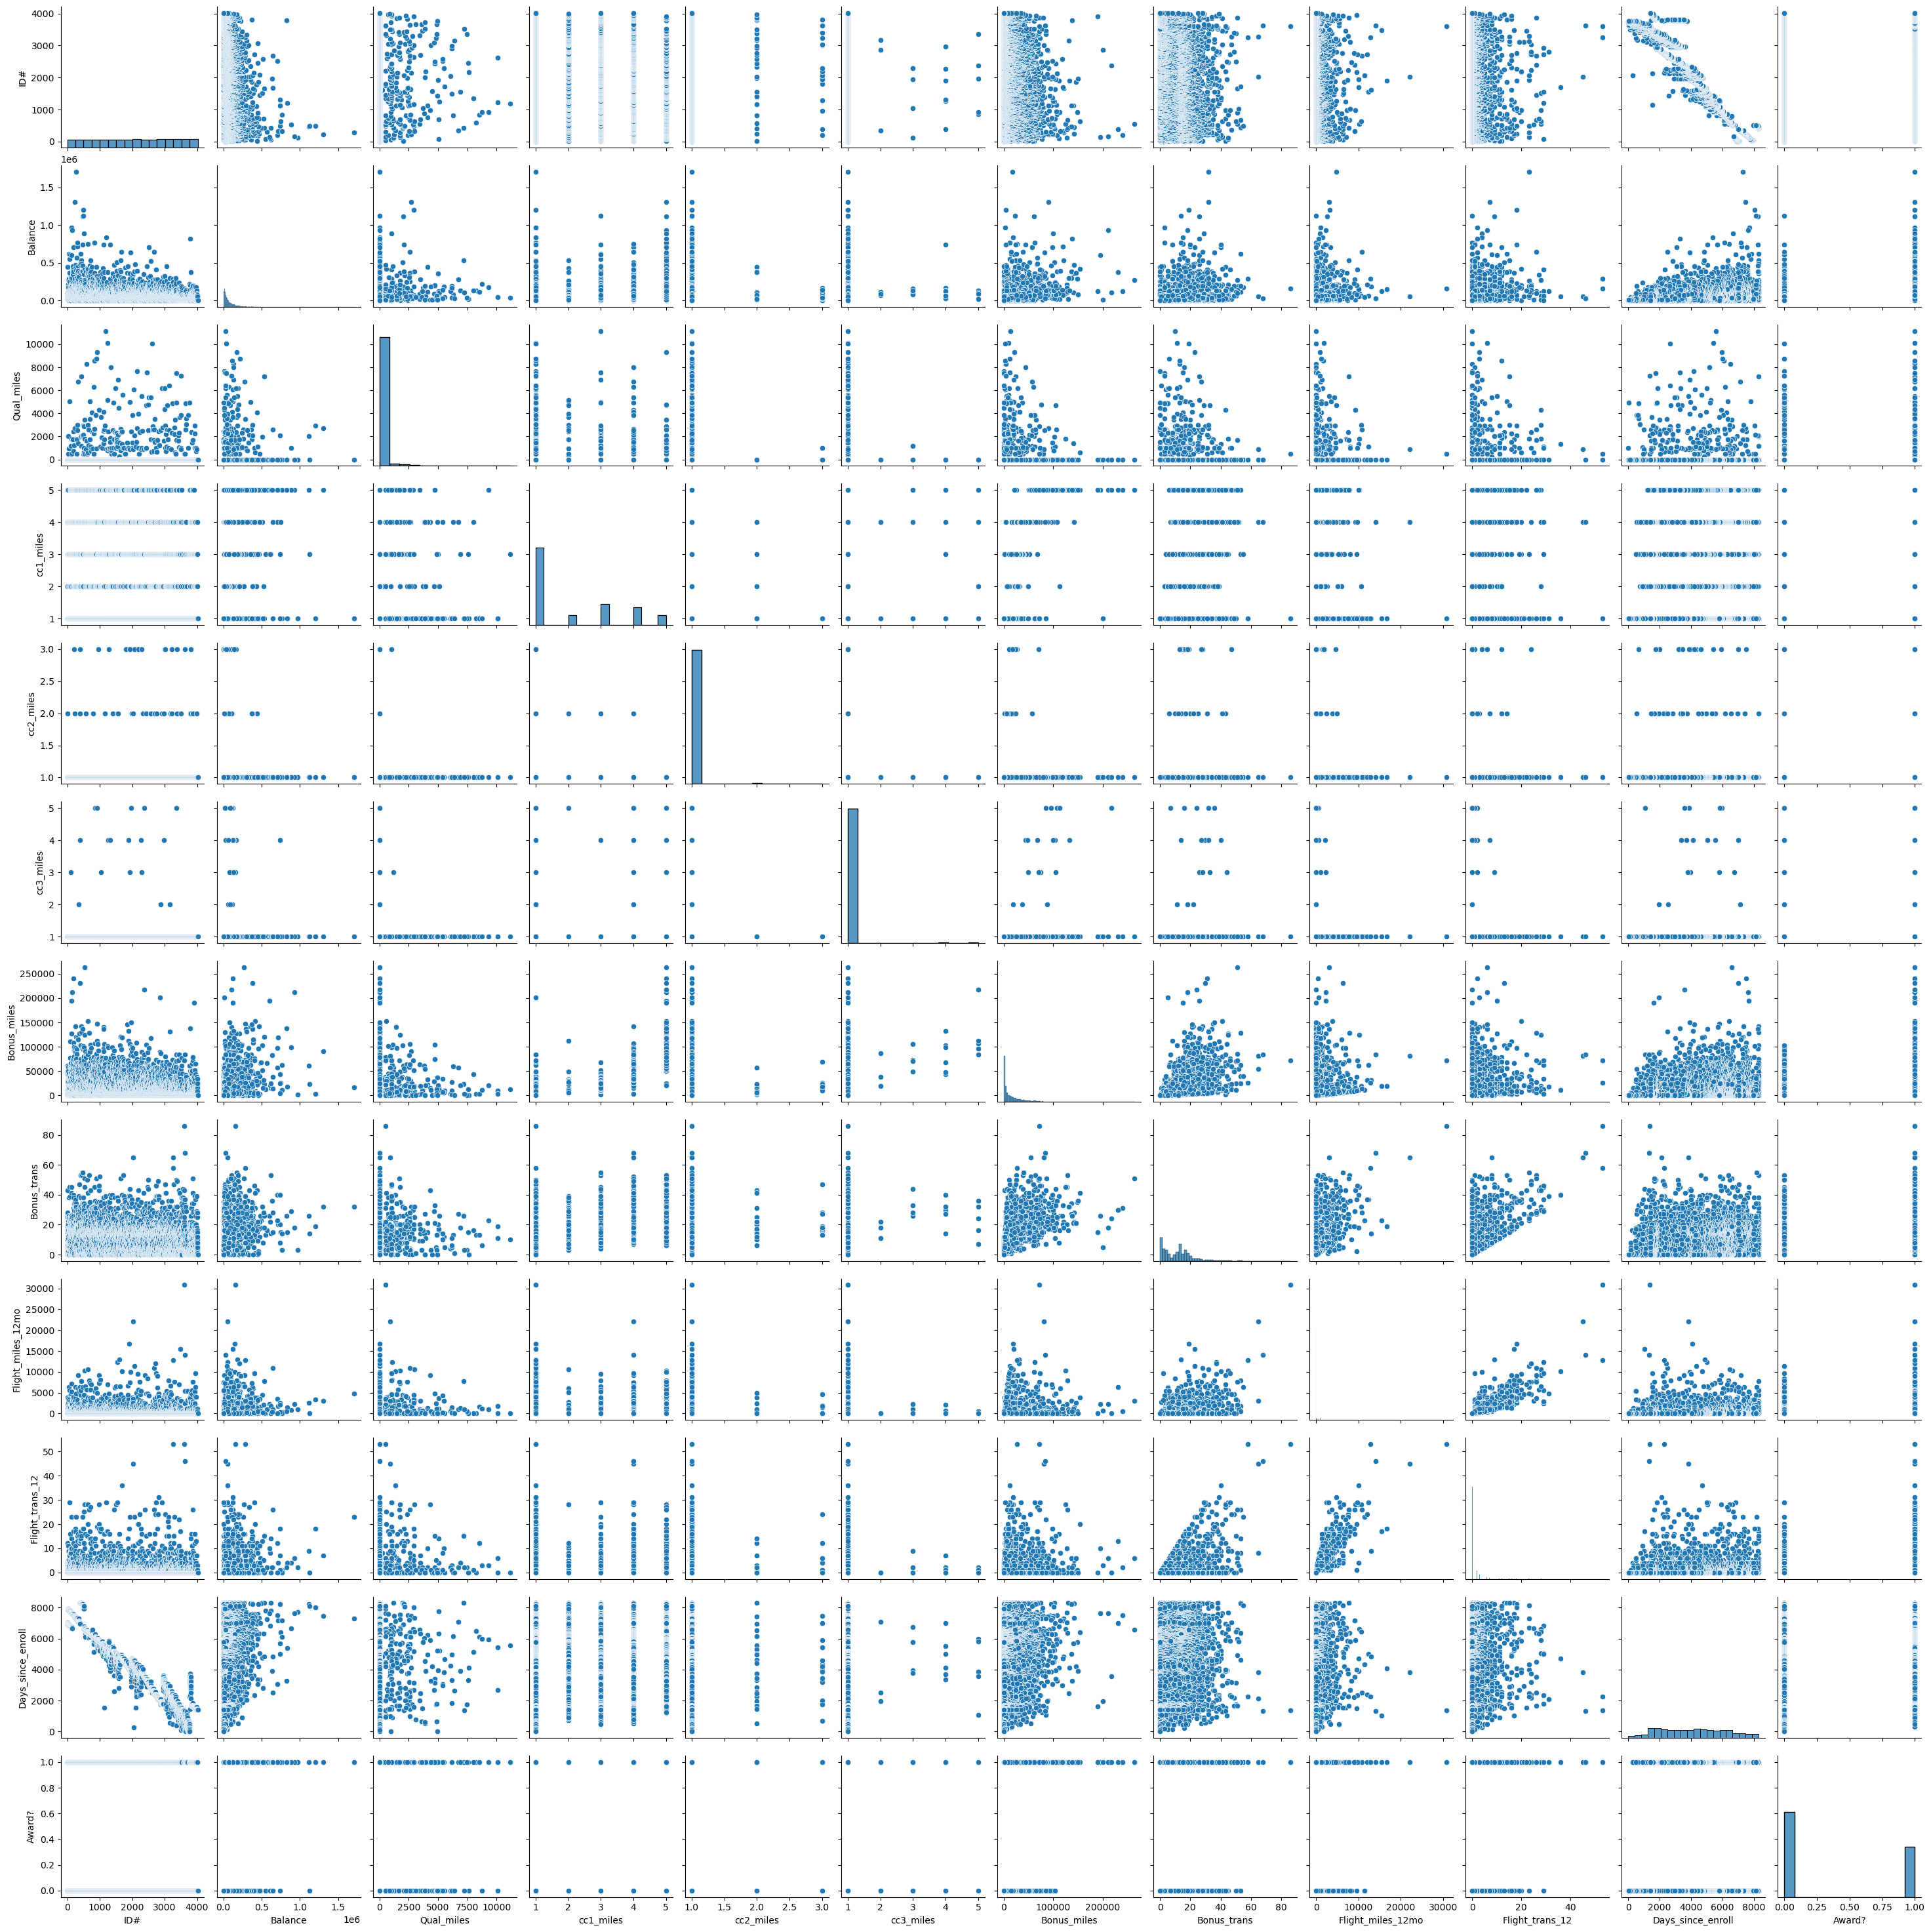

In [25]:
dataset = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
sns.pairplot(dataset)

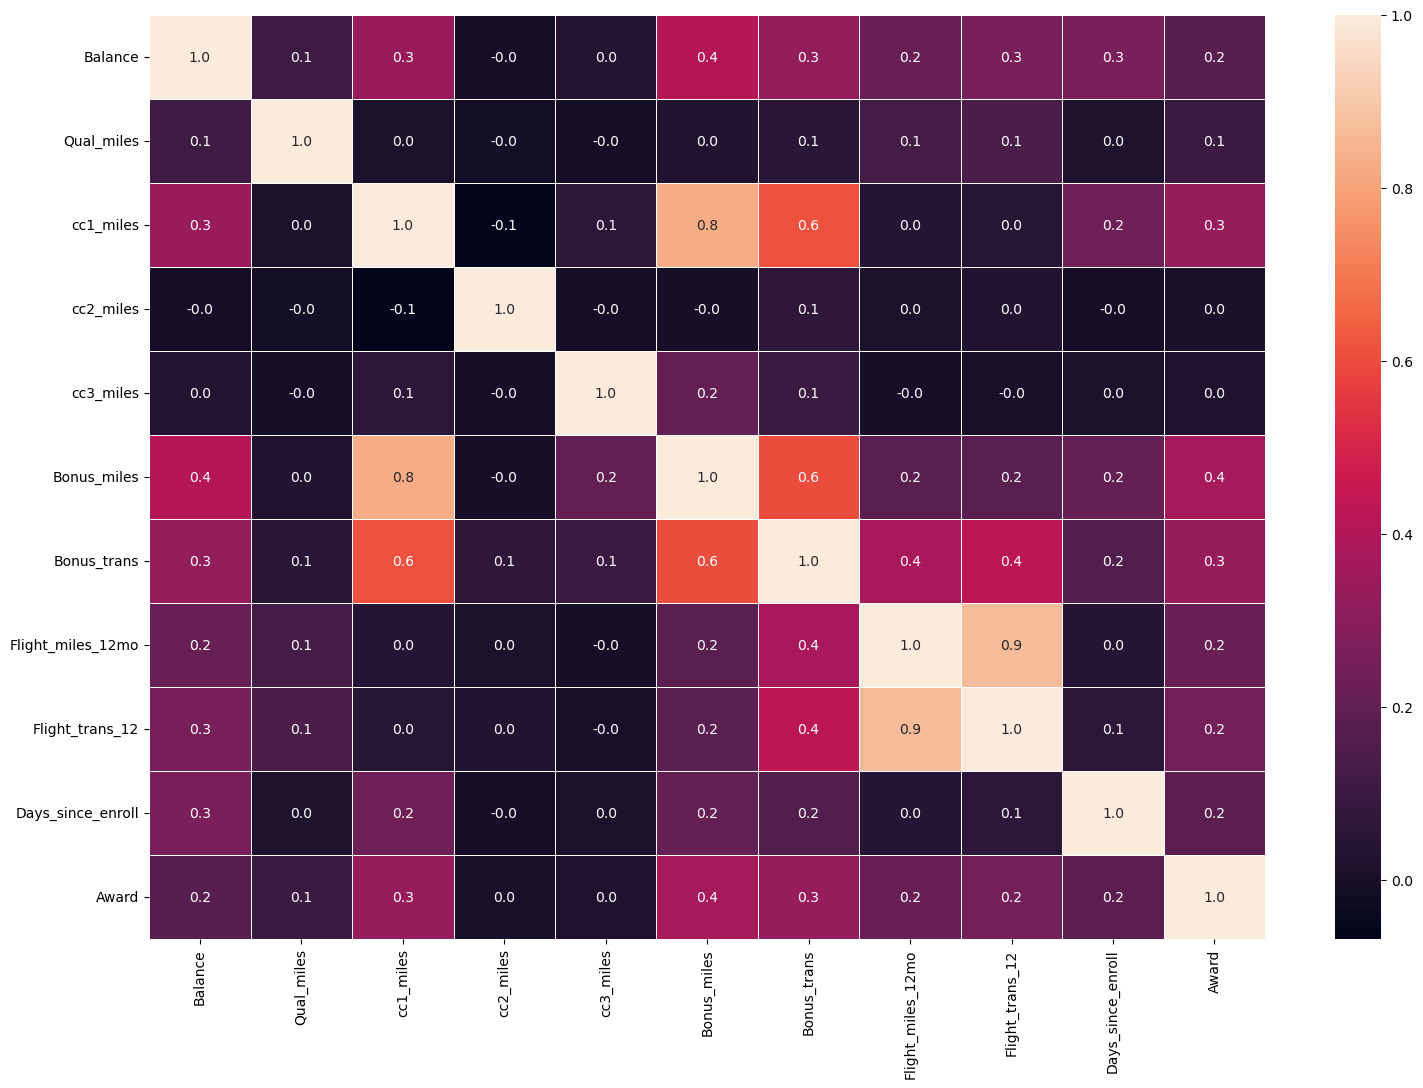

In [26]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

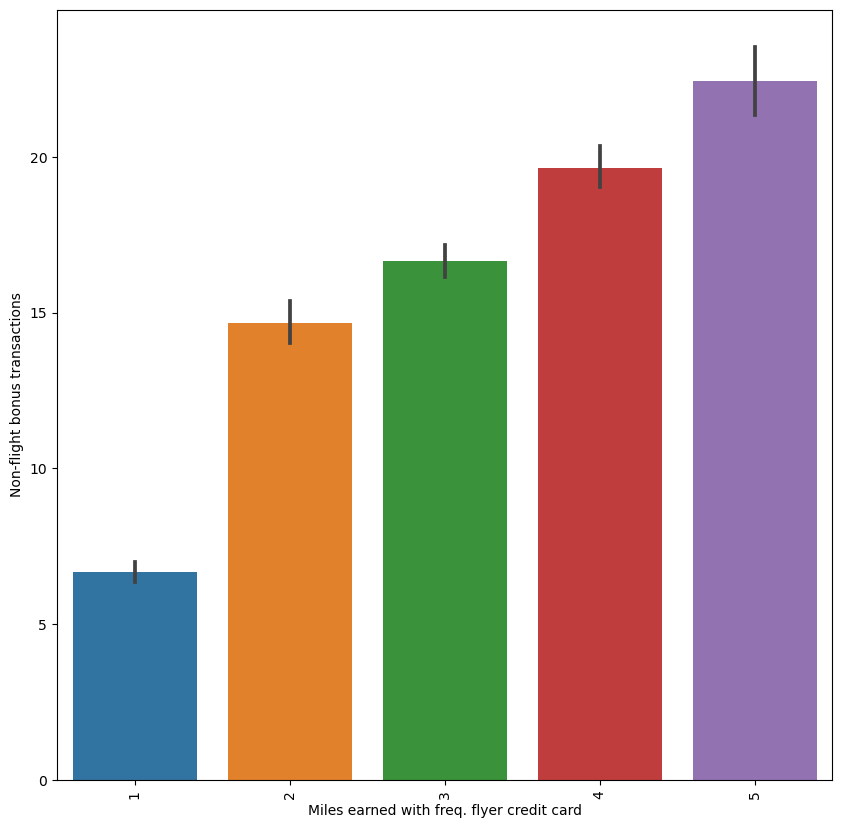

In [27]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing

### Standardizing the Data

In [28]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3999, 11)

### Normalizing the data

In [29]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3999, 11)

### KMeans Clustering

#### Standard Scaler Applied on Data

In [30]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,43989.000000
1,2,35409.512258
2,3,30899.216409
3,4,27154.085202
4,5,23708.800114
5,6,21470.860946
6,7,18891.926703
7,8,17369.591939
8,9,16067.838602
9,10,14727.935166


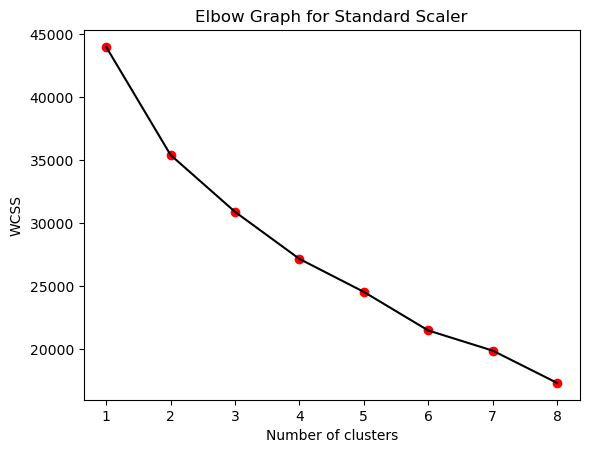

In [31]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset

In [32]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3999,)

In [33]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, ..., 1, 2, 2])

In [34]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [35]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [ 0.43381284, -0.11301262,  1.21014978, -0.09824189, -0.05449778,
         0.92813517,  0.75269133, -0.08065818, -0.08956555,  0.37079373,
         0.57854007],
       [-0.29444721, -0.12883455, -0.60151188, -0.09824189, -0.06071593,
        -0.51682757, -0.4934919 , -0.18636264, -0.19845942, -0.19791068,
        -0.34993321],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.387

In [36]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

21089.97362892965

In [37]:
#Assign clusters to the data set
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['Kmeans_label'] = model_kmeans.labels_

In [38]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,
0,1743.867133,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
1,1599.831858,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
2,2233.860465,43882.372895,43.558140,1.229751,1.000000,1.000401,4644.210104,6.852847,199.160385,0.621091,3706.378508,0.200882
3,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


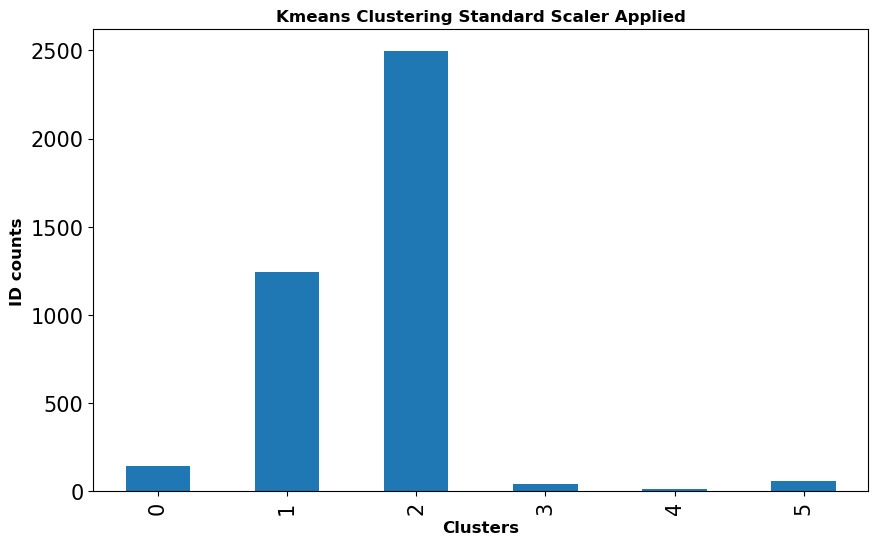

In [39]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Kmeans_label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [40]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,1830.793213
1,2,823.675698
2,3,625.168488
3,4,436.708858
4,5,348.943428
5,6,315.315596
6,7,287.874581
7,8,263.247541
8,9,243.916647
9,10,228.488260


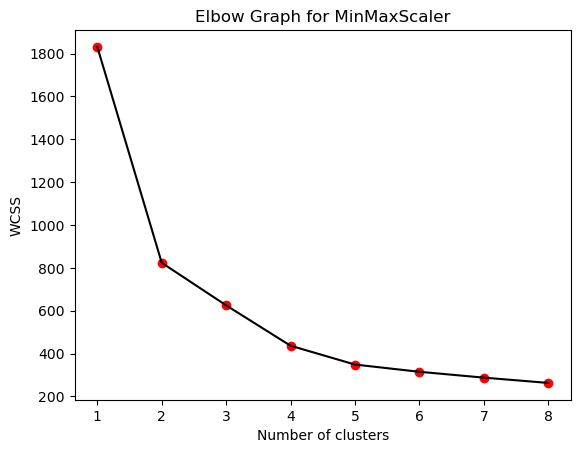

In [41]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

In [42]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3999,)

In [43]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [44]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [45]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[5.69280197e-02, 2.15461508e-02, 4.15428764e-01, 7.76502363e-03,
        4.55773126e-03, 1.09621005e-01, 1.83518364e-01, 2.78255837e-02,
        4.90489598e-02, 5.57398375e-01, 1.00000000e+00],
       [3.50812450e-02, 7.85813260e-03, 1.76330421e-01, 6.94996029e-03,
        2.18427323e-03, 3.87875269e-02, 1.06313612e-01, 7.34309944e-03,
        1.23113582e-02, 4.60411394e-01, 5.49560397e-15]])

In [46]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

823.6756984125207

In [47]:
#Assign clusters to the data set
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['Kmeans_label'] = model_kmeans.labels_

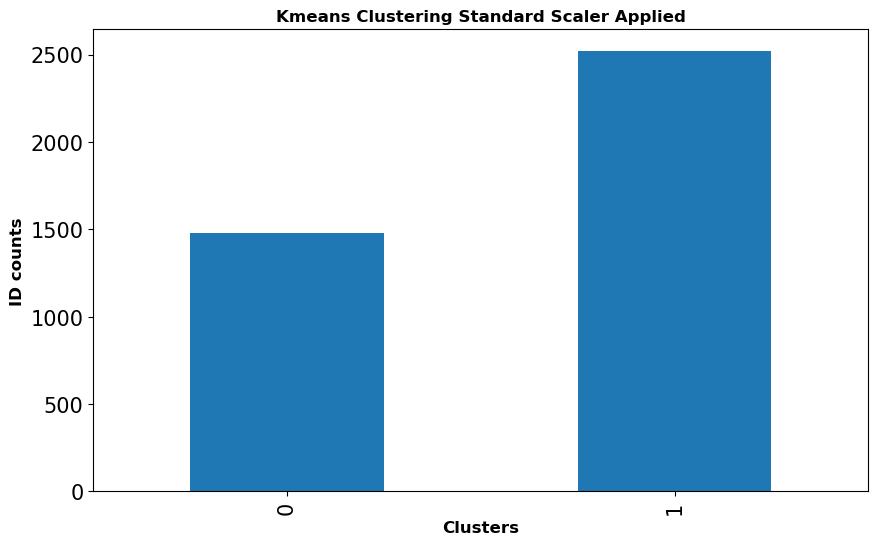

In [48]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Kmeans_label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [49]:
# Group data by Clusters (K=2)
df.groupby('Kmeans_label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,
0,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0


### Hierarchical Clustering Algorithm

#### Dendogram on MinMaxScaler Applied on Dataset

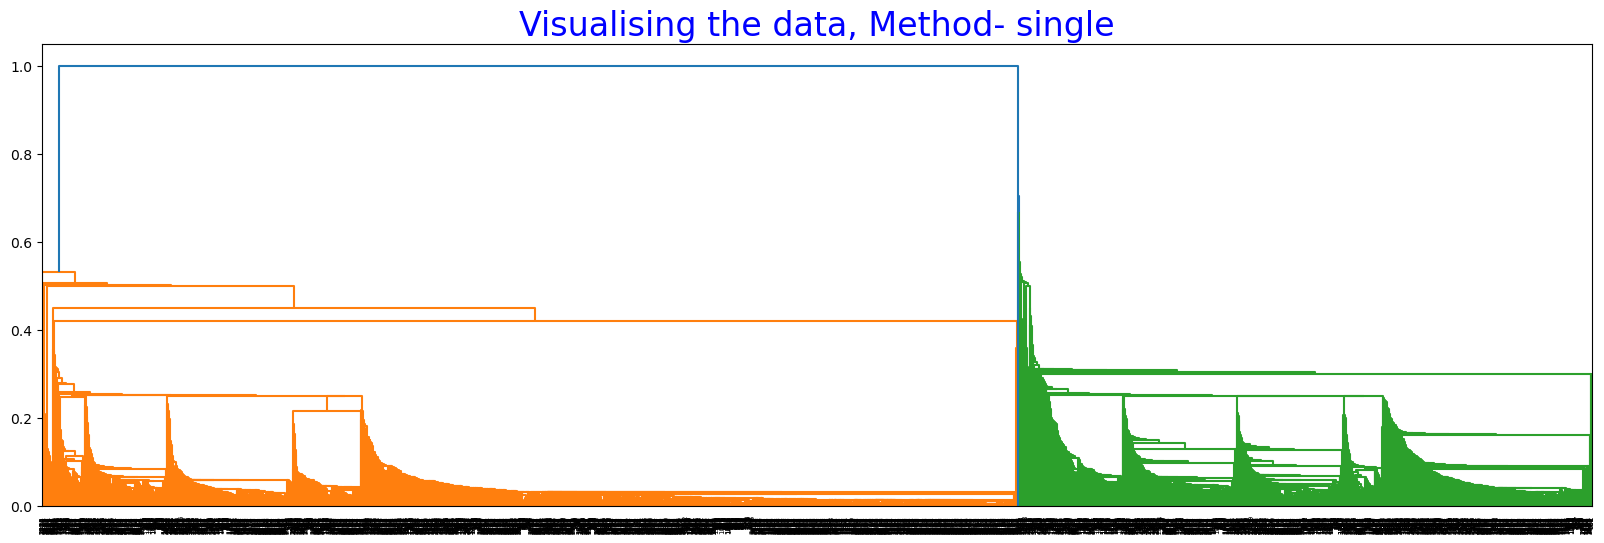

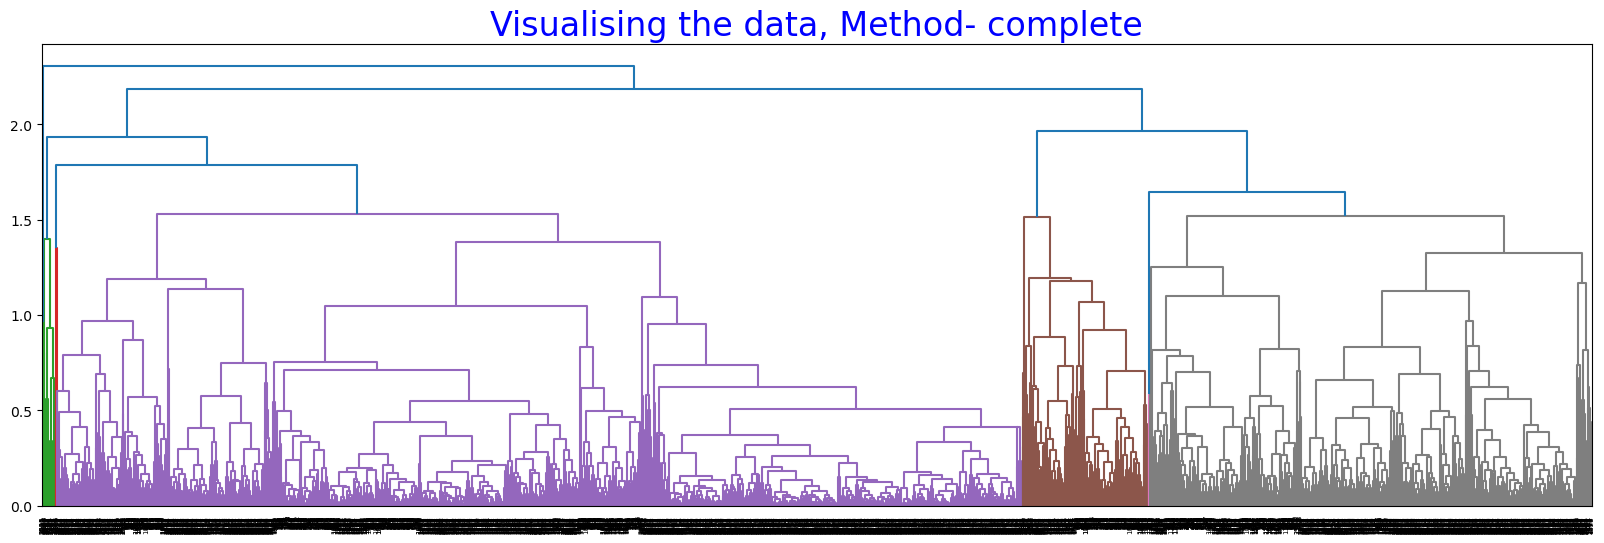

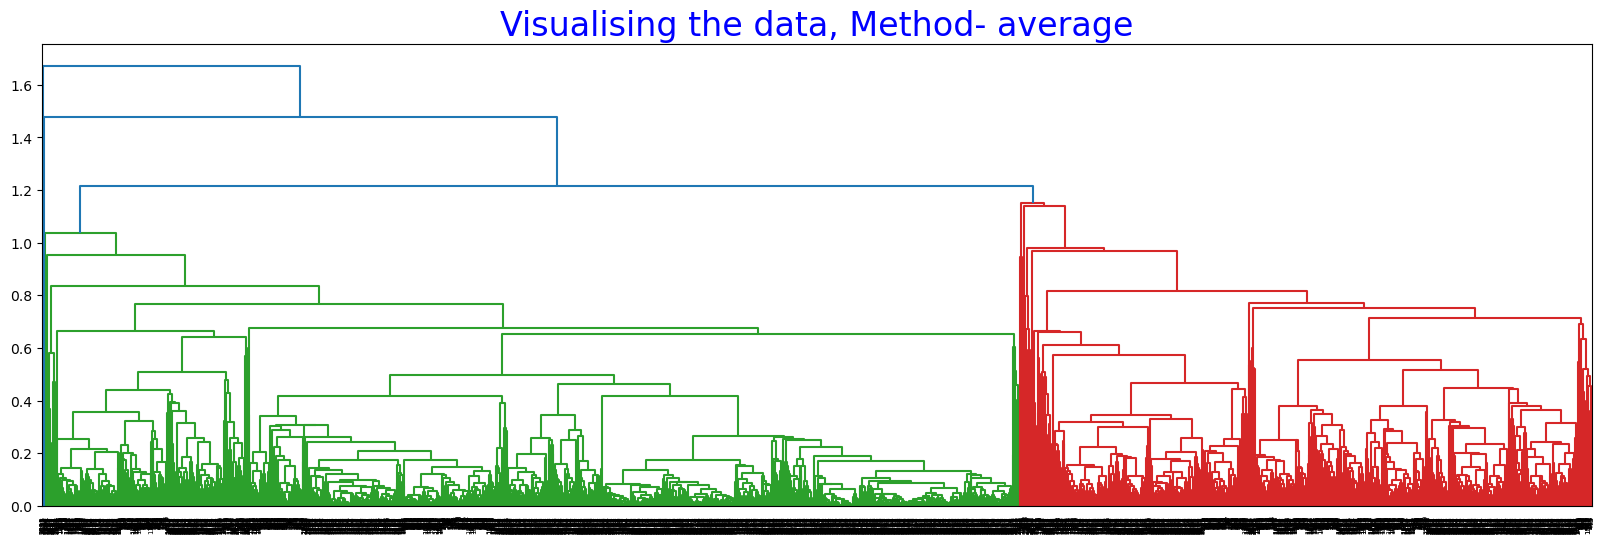

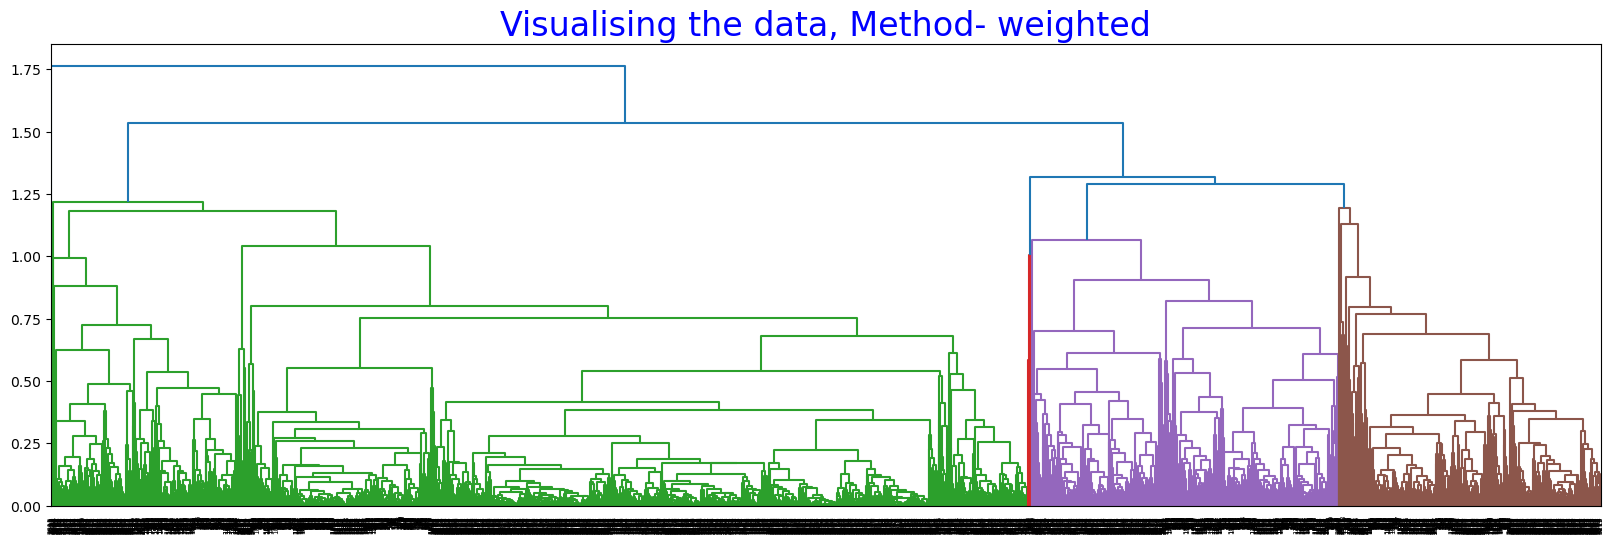

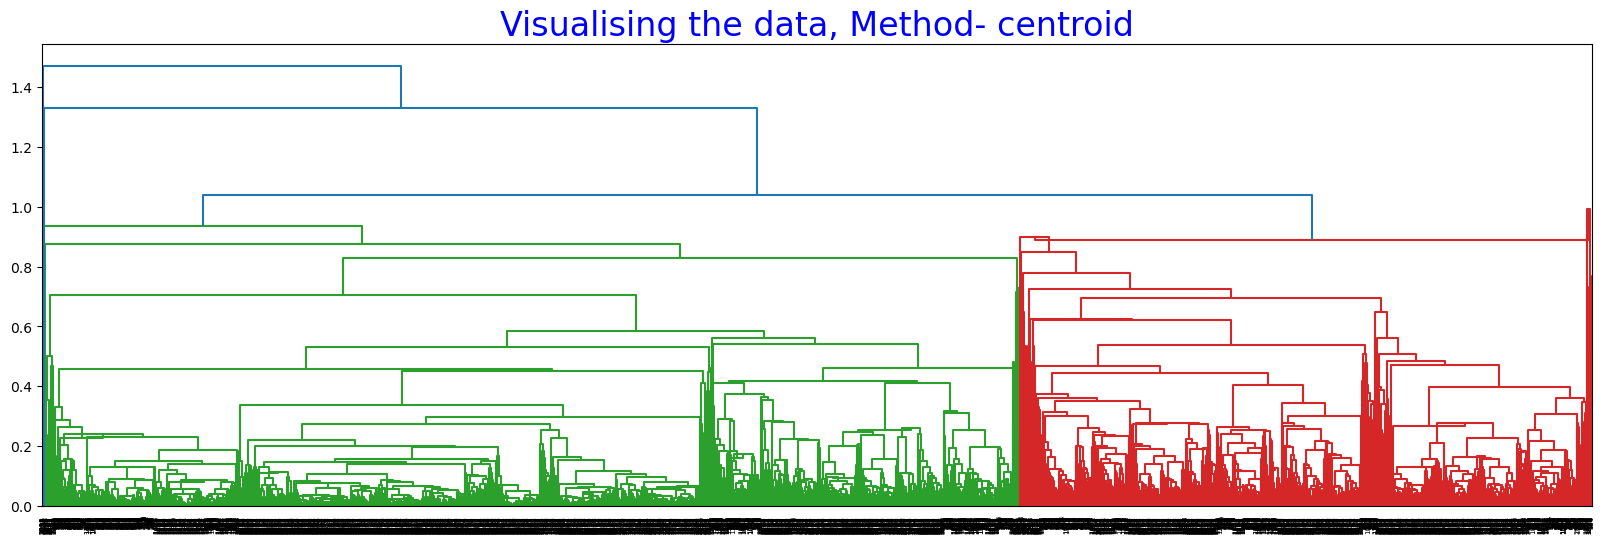

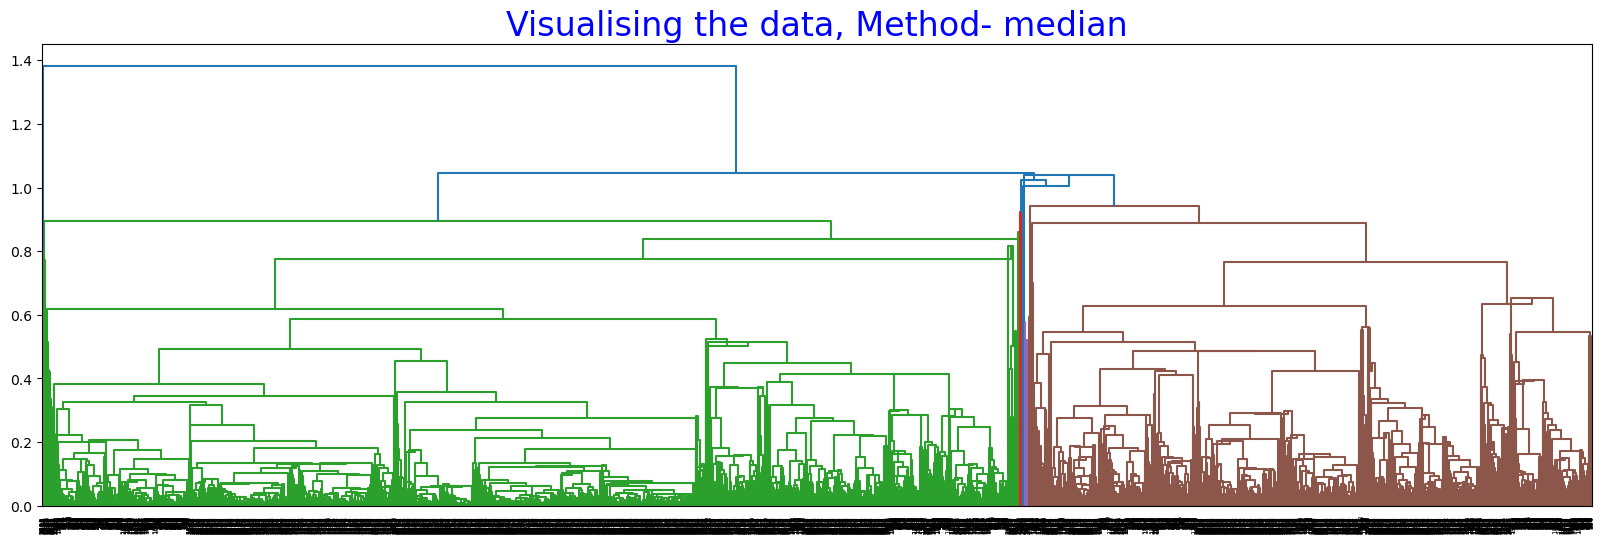

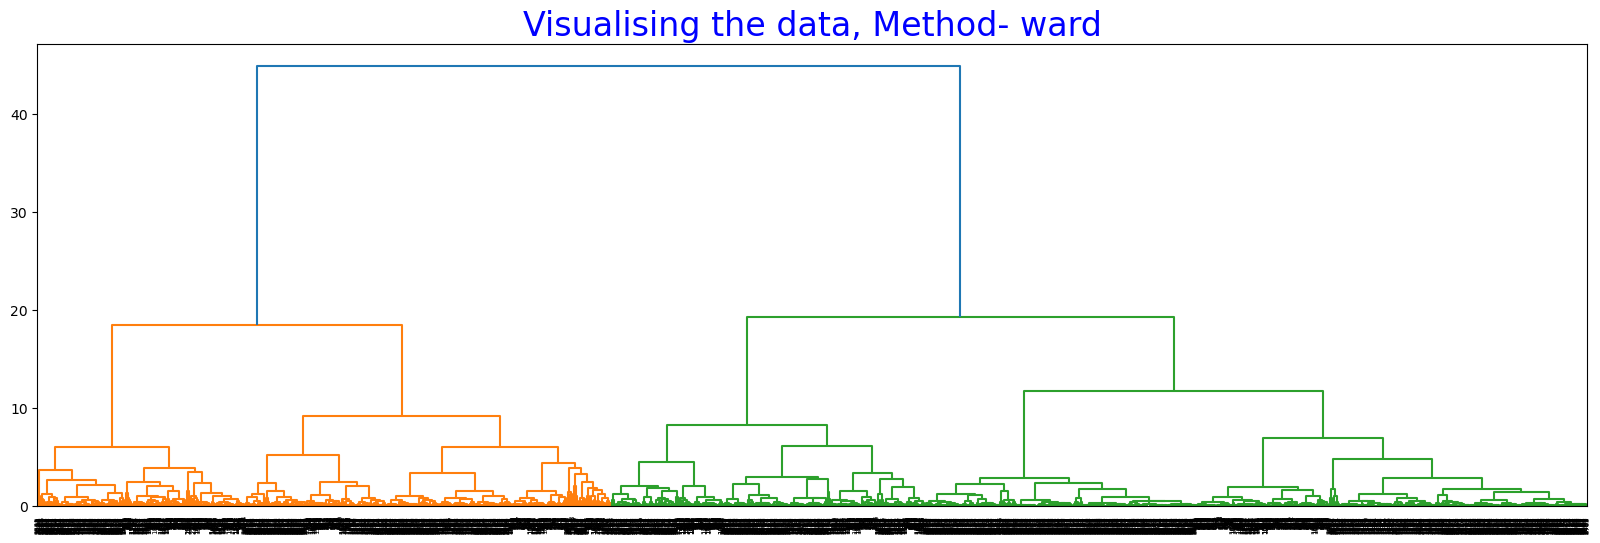

In [51]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

### Dendrogram on Standard Scaler Applied on Data

In [52]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46459708515197673
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
F

### DBSCAN of Standard Scaled Data

In [54]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

 ### Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22¶

In [58]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


In [59]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [60]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,DBSCAN_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0


In [62]:
df.groupby('DBSCAN_labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,,
-1,1708.947115,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,0.312500
0,2031.601688,66008.336587,68.482722,2.034819,1.000000,1.000000,15598.138486,10.880243,305.532577,0.925086,4082.893959,0.352941,0.647059


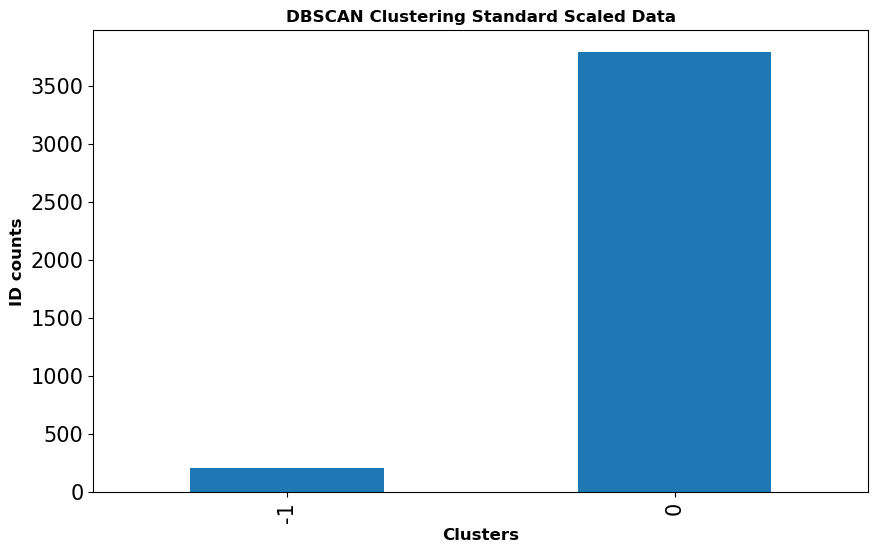

In [63]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['DBSCAN_labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### DBSCAN on MinMax Scaled Data

In [64]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [67]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


### Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3

In [68]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


#### Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values

In [69]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(eps=1, min_samples=22)

In [70]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [71]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [72]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
ID,2031.601688,NaN
Balance,66008.336587,NaN
Qual_miles,68.482722,NaN
cc1_miles,2.034819,NaN
cc2_miles,1.000000,NaN
cc3_miles,1.000000,NaN
Bonus_miles,15598.138486,NaN
Bonus_trans,10.880243,NaN
Flight_miles_12mo,305.532577,NaN
Flight_trans_12,0.925086,NaN


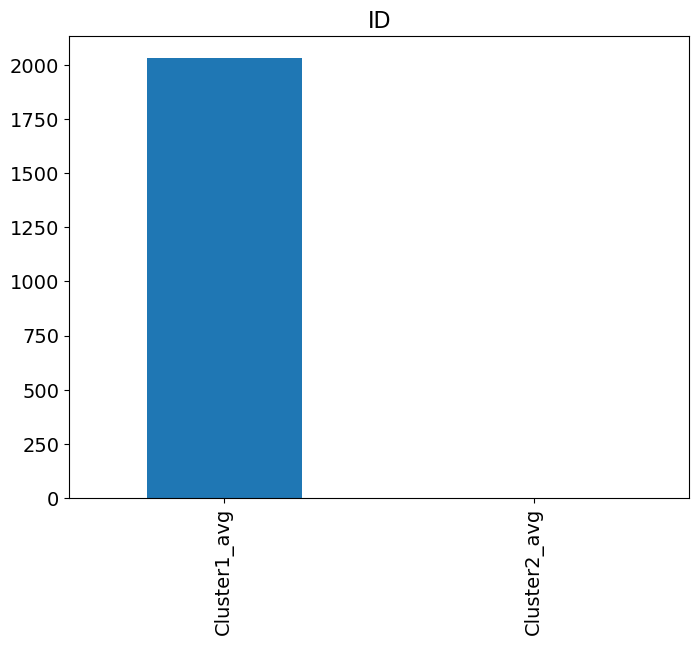

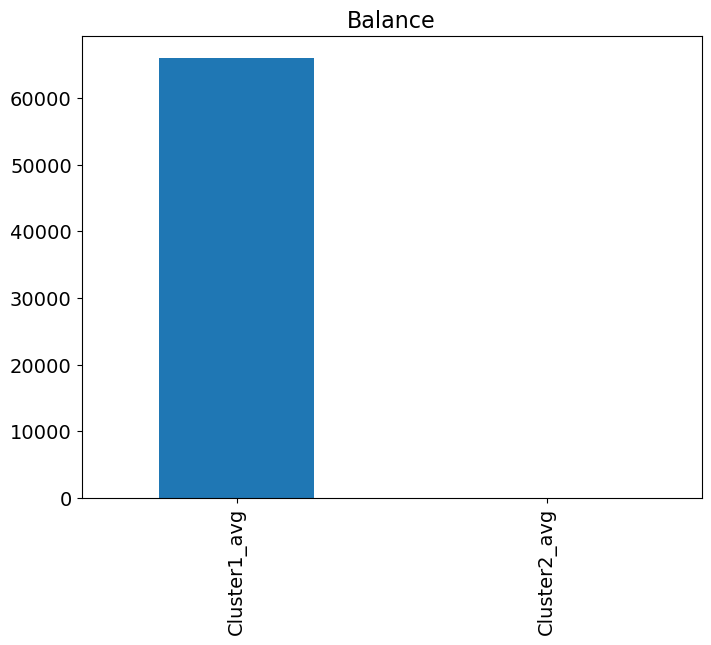

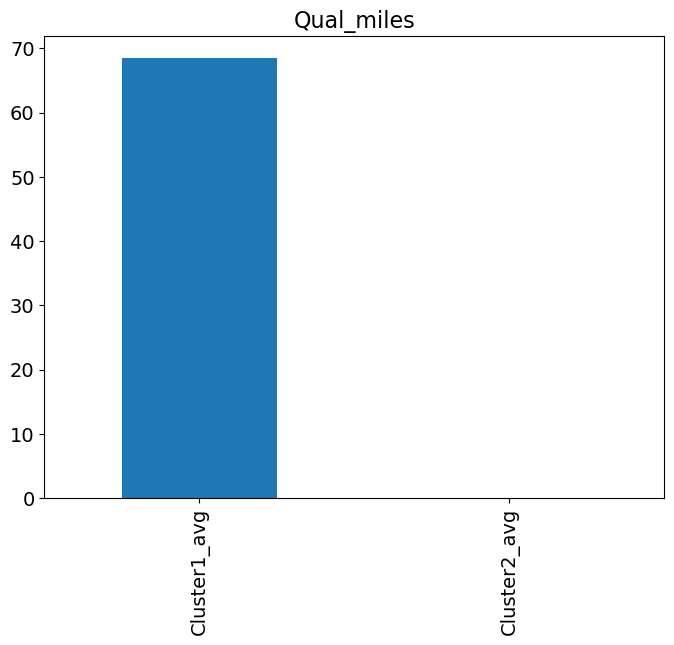

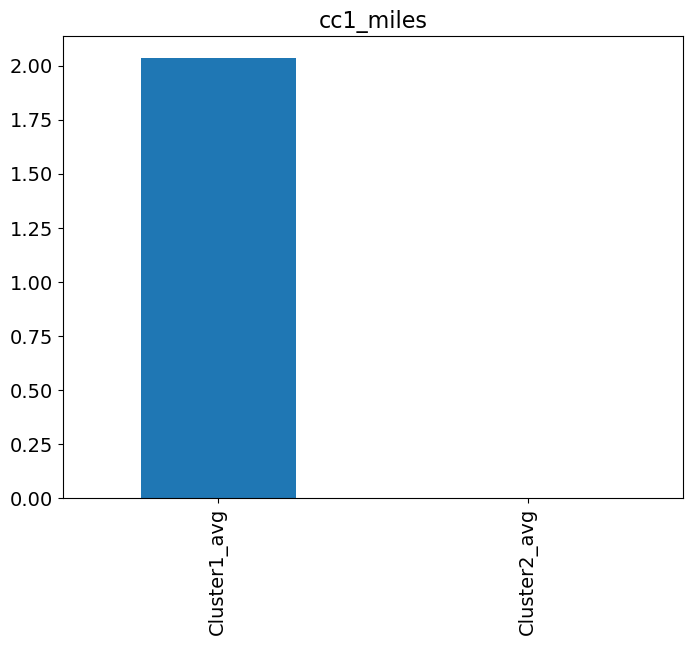

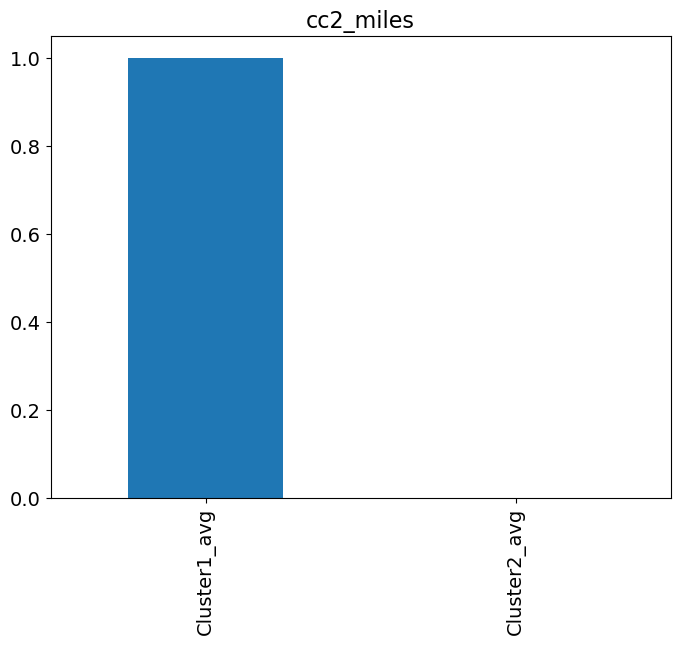

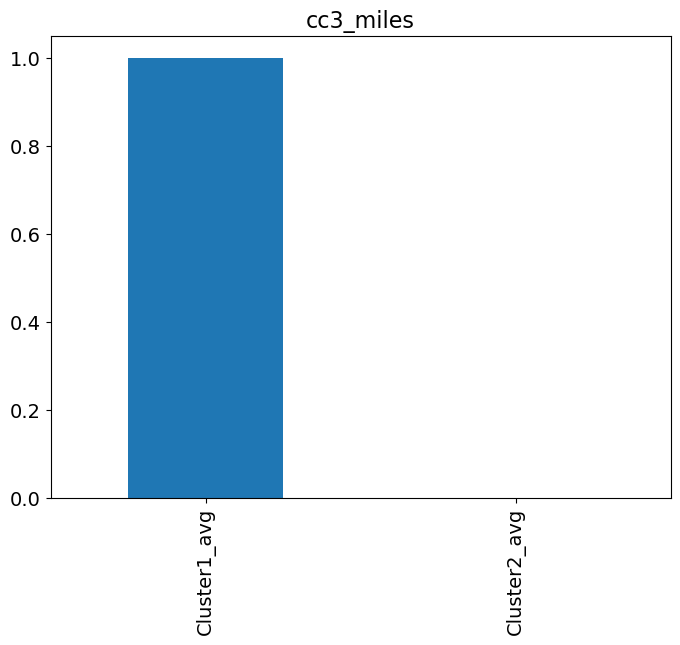

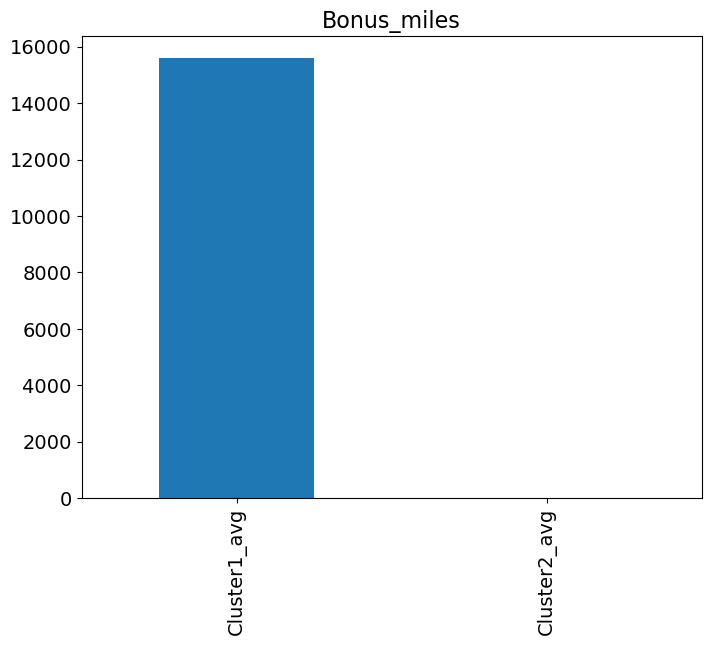

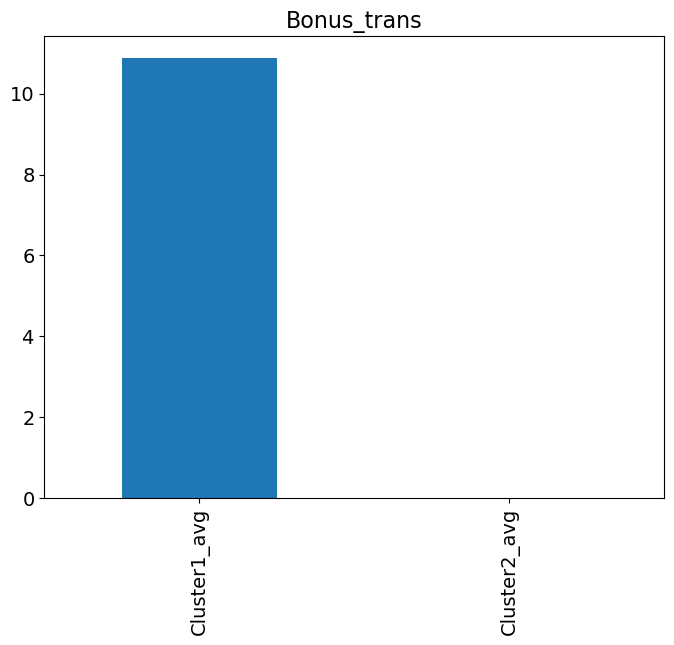

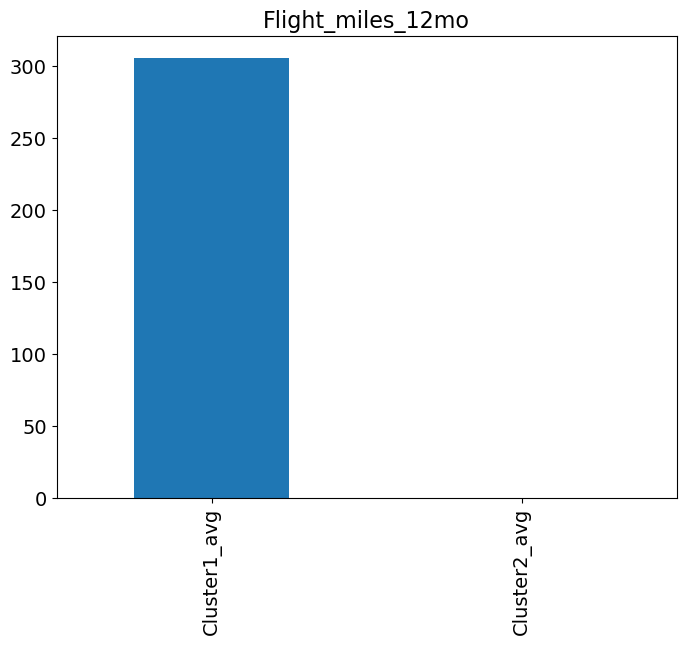

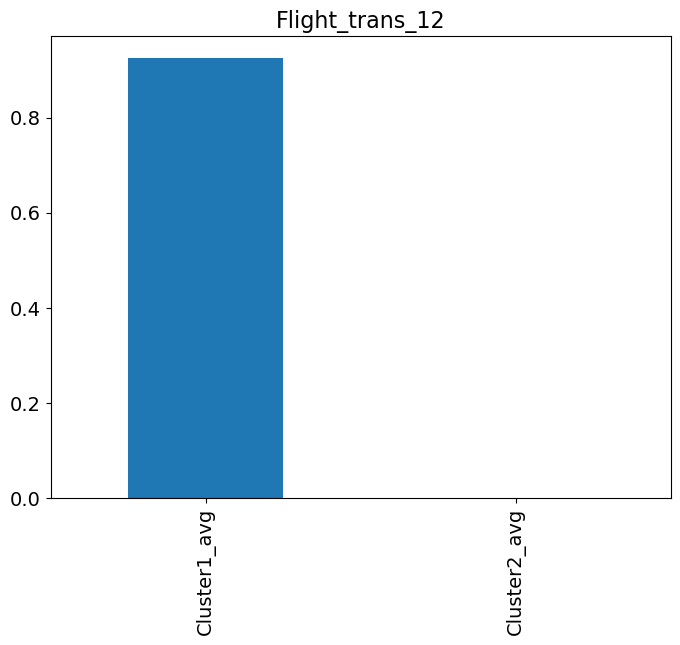

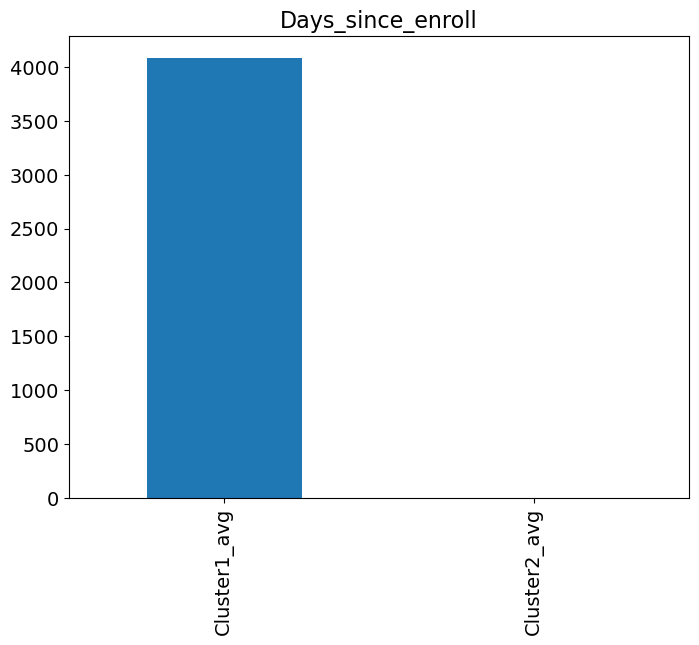

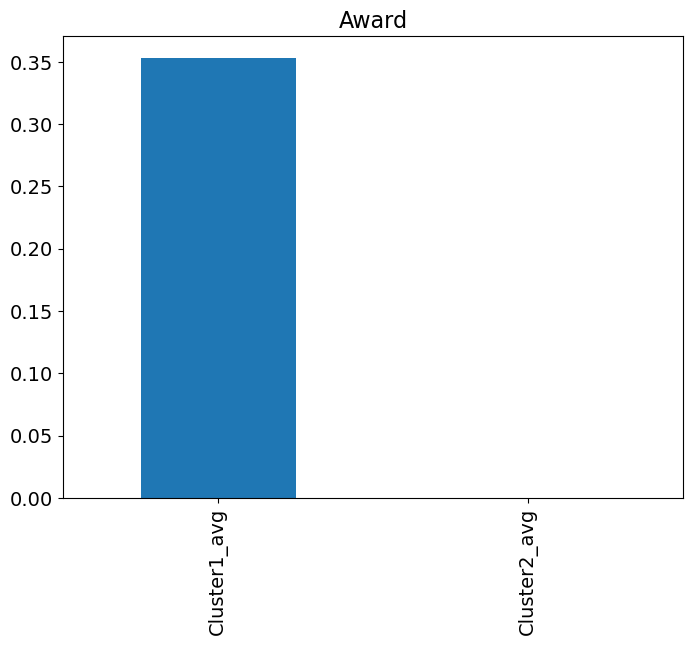

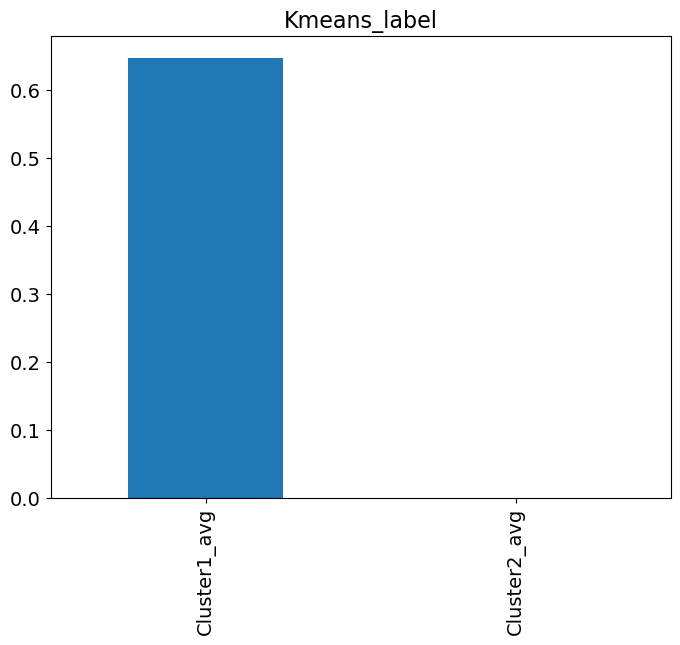

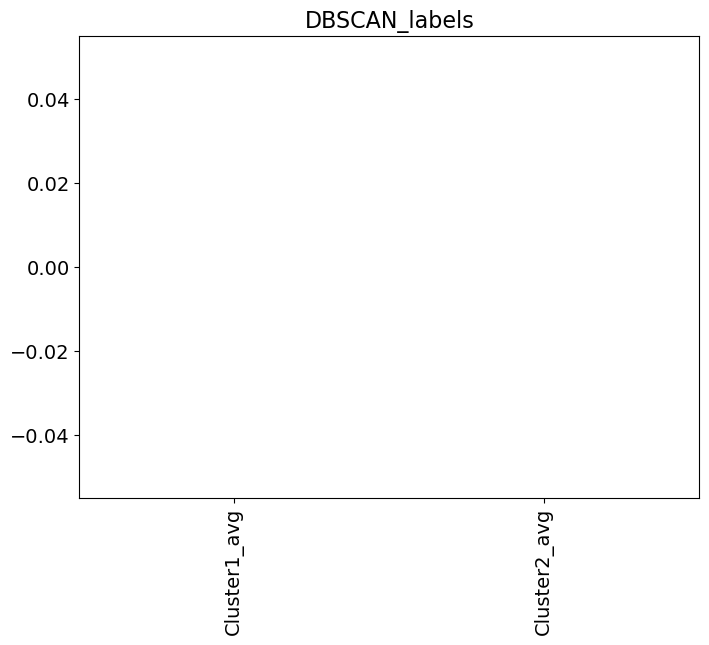

In [73]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()#
    print()

## Conclusion:
#### I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.¶
#### Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively
#### I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN
#### KMeans clustering is sensitive to outliers